In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf 
import datetime  

In [2]:
start = '2012-01-01'
end = datetime.datetime.now().strftime('%Y-%m-%d')
stock = 'AAPL'
# Get the data
data = yf.download(stock, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433826,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500648,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639428,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771556,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751301,394024400
...,...,...,...,...,...,...,...
3087,2024-04-11,168.339996,175.460007,168.160004,175.039993,175.039993,91070300
3088,2024-04-12,174.259995,178.360001,174.210007,176.550003,176.550003,101593300
3089,2024-04-15,175.360001,176.630005,172.500000,172.690002,172.690002,73531800
3090,2024-04-16,171.750000,173.759995,168.270004,169.380005,169.380005,73711200


In [4]:
ma_100_days = data['Close'].rolling(100).mean()


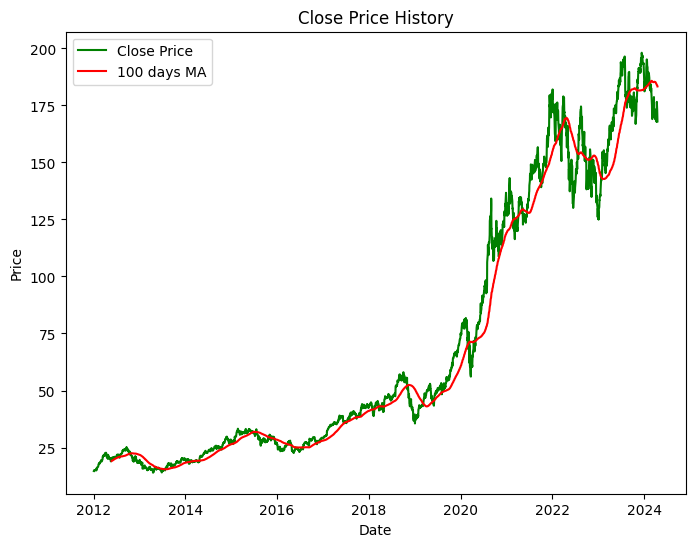

In [5]:
plt.figure(figsize=(8,6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='g')
plt.plot(data['Date'], ma_100_days, label='100 days MA', color='r')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')


In [6]:
ma_200_days = data['Close'].rolling(200).mean()

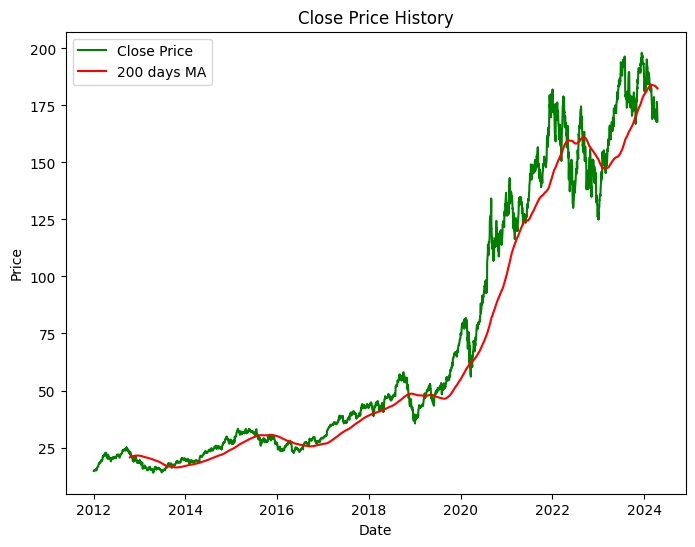

In [7]:
plt.figure(figsize=(8,6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='g')
plt.plot(data['Date'], ma_200_days, label='200 days MA', color='r')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')


In [8]:
data.dropna(inplace=True)

## Training...  ##

In [9]:
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):len(data)]) 

In [10]:
data_train.shape[0], data_test.shape[0]

(2473, 619)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [12]:
data_train_scale = scaler.fit_transform(data_train)

In [13]:
x_train = []
y_train = []
for i in range(100, data_train_scale.shape[0]):
    x_train.append(data_train_scale[i-100:i])
    y_train.append(data_train_scale[i,0])

In [14]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [15]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras import backend


In [16]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=((x_train.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

C:\Users\jestebangil\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 122ms/step - loss: 0.0476
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - loss: 0.0048
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - loss: 0.0048
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - loss: 0.0034
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step - loss: 0.0040
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - loss: 0.0036
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 114ms/step - loss: 0.0031
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - loss: 0.0032
Epoch 9/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 116ms/step - loss: 0.0026
Epoch 10/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - loss: 0.0042
Epoch 11/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 126ms/step - loss: 0.0034
Epoch 12/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 146ms/step - loss: 0.0030
Epoch 13/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 160ms/step - loss: 0.0033
Epoch 14/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 169ms/step - loss: 0.0026
Epoch 15/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 126ms/step

In [19]:
model.save('stock_prediction.h5')

In [20]:
data_test.head()

,Close
2473,149.800003
2474,148.960007
2475,150.020004
2476,151.490005
2477,150.960007


In [21]:
past_100_days = data_train.tail(100)

In [22]:
final_df = past_100_days._append(data_test, ignore_index=True)
final_df.head()

,Close
0,127.129997
1,126.110001
2,127.349998
3,130.479996
4,129.639999


In [23]:
input_data = scaler.fit_transform(final_df)
input_data
input_data.shape

(719, 1)

In [24]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [25]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape, y_test.shape)

(619, 100, 1) (619,)


## Making Predictions ##

In [26]:
y_predicted = model.predict(x_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step


In [27]:
y_predicted.shape

(619, 1)

In [28]:
y_test

array([3.39034137e-01, 3.27541507e-01, 3.42044141e-01, 3.62156347e-01,
       3.54905030e-01, 3.59283085e-01, 3.47790456e-01, 3.52852641e-01,
       3.13312359e-01, 3.12628229e-01, 3.41633705e-01, 3.41770447e-01,
       3.55452209e-01, 3.89519870e-01, 4.49445843e-01, 4.86113073e-01,
       4.92543517e-01, 4.97879396e-01, 5.05130713e-01, 4.34943210e-01,
       4.81871760e-01, 5.51101440e-01, 5.43850123e-01, 5.30031410e-01,
       5.03762453e-01, 5.51375133e-01, 6.31550055e-01, 6.84909050e-01,
       6.77794476e-01, 7.44698281e-01, 6.93939063e-01, 6.74647729e-01,
       7.42646100e-01, 6.46326383e-01, 6.31002876e-01, 6.11985236e-01,
       6.56314219e-01, 6.92570803e-01, 7.01327122e-01, 7.56738298e-01,
       7.42509149e-01, 7.43740666e-01, 7.27596079e-01, 7.18976711e-01,
       7.79723557e-01, 7.48118721e-01, 6.82719918e-01, 6.42769200e-01,
       6.45095074e-01, 6.45368768e-01, 6.84909050e-01, 6.91065801e-01,
       6.45368768e-01, 6.57408785e-01, 6.12669366e-01, 5.63825378e-01,
      

In [29]:
y_predicted

array([[0.29284388],
       [0.30311686],
       [0.31222713],
       [0.31992656],
       [0.32635468],
       [0.33168647],
       [0.33613482],
       [0.33975863],
       [0.34263888],
       [0.34448934],
       [0.3450523 ],
       [0.34457225],
       [0.34343928],
       [0.34213567],
       [0.341383  ],
       [0.3423561 ],
       [0.34631205],
       [0.35403523],
       [0.36575955],
       [0.3811623 ],
       [0.39797485],
       [0.41475573],
       [0.43157917],
       [0.44861072],
       [0.4654817 ],
       [0.4810421 ],
       [0.49519295],
       [0.5091002 ],
       [0.52422744],
       [0.54121375],
       [0.56057286],
       [0.58146095],
       [0.6023063 ],
       [0.6226022 ],
       [0.64033586],
       [0.6537809 ],
       [0.66176236],
       [0.6652983 ],
       [0.66643965],
       [0.6671386 ],
       [0.6693092 ],
       [0.67381865],
       [0.68068194],
       [0.6890127 ],
       [0.6975458 ],
       [0.7062643 ],
       [0.71469563],
       [0.721

In [30]:
scaler.scale_

array([0.01368176])

In [31]:
scale_factor = 1/8.18605127e-04
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

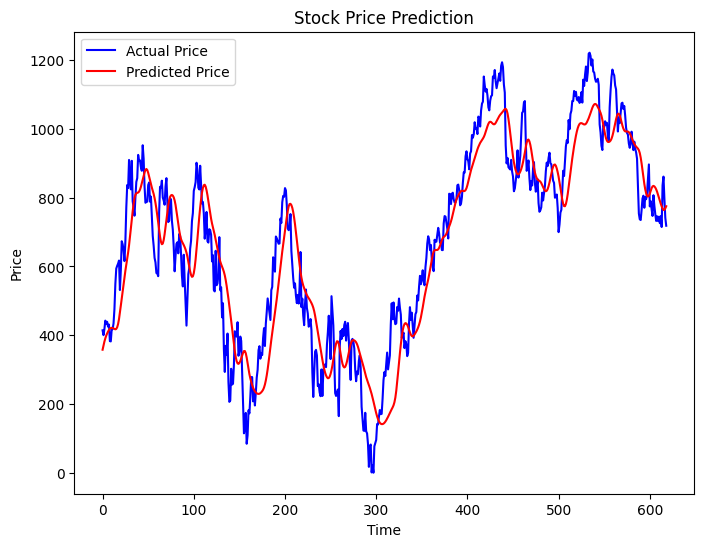

In [32]:
plt.figure(figsize=(8,6))
plt.plot(y_test, color='blue', label='Actual Price')
plt.plot(y_predicted, color='red', label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')